In [33]:
#Notebook for model 7
# decided to do this one once a semi understanding of how to manipluate and extract data from the relatively smaller data sets first 
# Will aim to implement the knowledge from preivous notebooks here 
# Aimning to extrapolate all the info and create and replecate similar procedures 
# 

In [34]:
#Import statements

# refer to documentation(WorkFlow)
# to understand why each library is used and what purpose(s)
# library update(s)

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import pdist, squareform
from skbio.stats.distance import mantel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [35]:
# Load CSV file into Dataframe
csvfilePath = '/Users/schoudhry/Desktop/Supplementary Tables S7 - S7.csv'
df = pd.read_csv(csvfilePath)

second_column_name = df.columns[1]
second_column = df[second_column_name]

# Sort the column
sorted_column = second_column.sort_values()

# Find and print matching values
matching_values = sorted_column[sorted_column.duplicated(keep = False)]

print("Matching values in the second column")
print(matching_values)
print("Column names:")
print(df.columns)

Matching values in the second column
165                Bacteria;Actinobacteria;Actinobacteria
937                Bacteria;Actinobacteria;Actinobacteria
216                Bacteria;Actinobacteria;Actinobacteria
930     Bacteria;Actinobacteria;Actinobacteria;Microco...
1157    Bacteria;Actinobacteria;Actinobacteria;Microco...
                              ...                        
1289    Bacteria;Proteobacteria;Betaproteobacteria;Bur...
27      Bacteria;Proteobacteria;Betaproteobacteria;Bur...
1160    Bacteria;Proteobacteria;Betaproteobacteria;Bur...
772     Bacteria;Proteobacteria;Betaproteobacteria;Nei...
712     Bacteria;Proteobacteria;Betaproteobacteria;Nei...
Name: Unnamed: 1, Length: 1279, dtype: object
Column names:
Index(['Table S7: Significant and stability-selected host gene-microbe associations at FDR < 0.1 for IBD data',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype=

In [36]:
set1 = matching_values[matching_values.str.contains("Actinobacteria")]
set2 = matching_values[matching_values.str.contains("Betaproteobacteria")]

# Check for continous data 
X_column = 'Unnamed: 2'  
Y_column = 'Unnamed: 3'  


# Perform regression on Set 1
set1_indices = set1.index
X_set1 = df.loc[set1_indices, [X_column]].values
Y_set1 = df.loc[set1_indices, Y_column].values

regressor1 = LinearRegression()
regressor1.fit(X_set1, Y_set1)
print("Regression coefficients for Set 1:", regressor1.coef_)
print("Intercept for Set 1:", regressor1.intercept_)

# Perform regression on Set 2
set2_indices = set2.index
X_set2 = df.loc[set2_indices, [X_column]].values
Y_set2 = df.loc[set2_indices, Y_column].values

regressor2 = LinearRegression()
regressor2.fit(X_set2, Y_set2)
print("Regression coefficients for Set 2:", regressor2.coef_)
print("Intercept for Set 2:", regressor2.intercept_)

Regression coefficients for Set 1: [0.96757243]
Intercept for Set 1: -0.04051956538299595
Regression coefficients for Set 2: [0.97940598]
Intercept for Set 2: -0.047394300437324455


Column names:
Index(['Table S7: Significant and stability-selected host gene-microbe associations at FDR < 0.1 for IBD data',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')
Matching values in the second column
165                Bacteria;Actinobacteria;Actinobacteria
937                Bacteria;Actinobacteria;Actinobacteria
216                Bacteria;Actinobacteria;Actinobacteria
930     Bacteria;Actinobacteria;Actinobacteria;Microco...
1157    Bacteria;Actinobacteria;Actinobacteria;Microco...
                              ...                        
1289    Bacteria;Proteobacteria;Betaproteobacteria;Bur...
27      Bacteria;Proteobacteria;Betaproteobacteria;Bur...
1160    Bacteria;Proteobacteria;Betaproteobacteria;Bur...
772     Bacteria;Proteobacteria;Betaproteobacteria;Nei...
712     Bacteria;Proteobacteria;Betaproteobacteria;Nei...
Name: Unnamed: 1, Length: 1279, dtyp

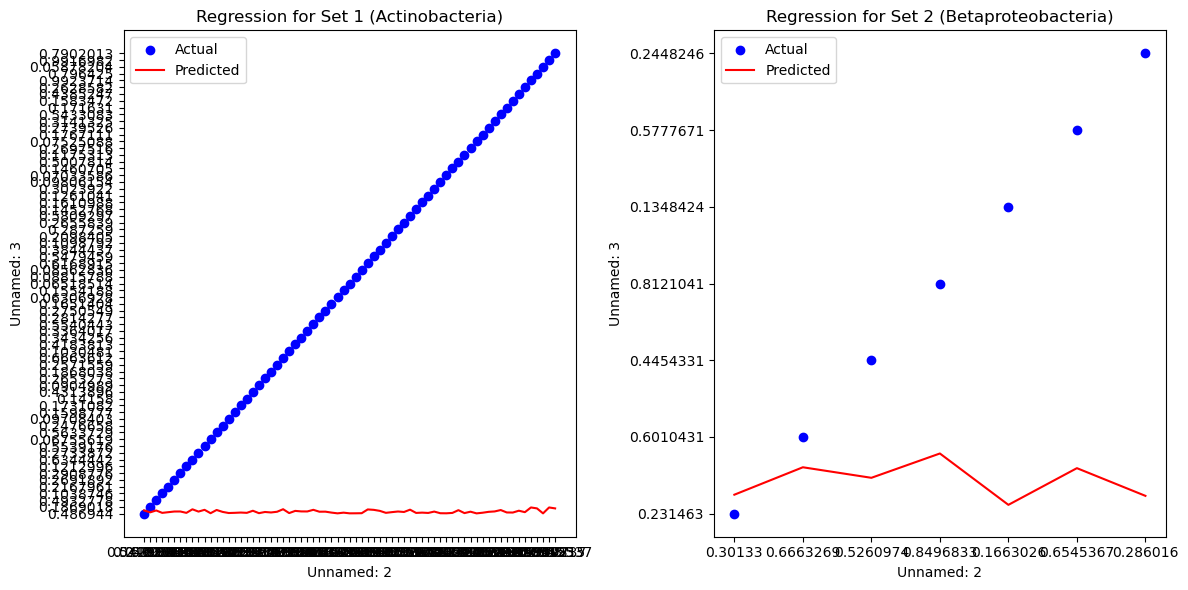

In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Load CSV file into DataFrame
csvfilePath = '/Users/schoudhry/Desktop/Supplementary Tables S7 - S7.csv'
df = pd.read_csv(csvfilePath)

# Print column names
print("Column names:")
print(df.columns)

# Step 2: Extract the second column
second_column_name = df.columns[1]
second_column = df[second_column_name]

# Step 3: Sort and find matching values in the second column
sorted_column = second_column.sort_values()
matching_values = sorted_column[sorted_column.duplicated(keep=False)]

print("Matching values in the second column")
print(matching_values)

# Step 4: Identify and separate different matching sets
set1 = matching_values[matching_values.str.contains("Actinobacteria")]
set2 = matching_values[matching_values.str.contains("Betaproteobacteria")]

# Ensure you have continuous data for regression
# Replace 'Unnamed: 2' and 'Unnamed: 3' with actual column names for independent and dependent variables
X_column = 'Unnamed: 2'  # Replace with actual column name for independent variable
Y_column = 'Unnamed: 3'  # Replace with actual column name for dependent variable

# Step 5: Perform regression on each set separately

# Perform regression on Set 1
set1_indices = set1.index
X_set1 = df.loc[set1_indices, [X_column]].values
Y_set1 = df.loc[set1_indices, Y_column].values

regressor1 = LinearRegression()
regressor1.fit(X_set1, Y_set1)
Y_set1_pred = regressor1.predict(X_set1)

# Perform regression on Set 2
set2_indices = set2.index
X_set2 = df.loc[set2_indices, [X_column]].values
Y_set2 = df.loc[set2_indices, Y_column].values

regressor2 = LinearRegression()
regressor2.fit(X_set2, Y_set2)
Y_set2_pred = regressor2.predict(X_set2)

# Step 6: Plot the results

# Plot for Set 1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_set1.ravel(), Y_set1, color='blue', label='Actual')  # Use ravel() to flatten the array
plt.plot(X_set1.ravel(), Y_set1_pred, color='red', label='Predicted')
plt.title('Regression for Set 1 (Actinobacteria)')
plt.xlabel(X_column)
plt.ylabel(Y_column)
plt.legend()

# Plot for Set 2
plt.subplot(1, 2, 2)
plt.scatter(X_set2.ravel(), Y_set2, color='blue', label='Actual')  # Use ravel() to flatten the array
plt.plot(X_set2.ravel(), Y_set2_pred, color='red', label='Predicted')
plt.title('Regression for Set 2 (Betaproteobacteria)')
plt.xlabel(X_column)
plt.ylabel(Y_column)
plt.legend()

plt.tight_layout()
plt.show()


Matching values in the second column
165                Bacteria;Actinobacteria;Actinobacteria
937                Bacteria;Actinobacteria;Actinobacteria
216                Bacteria;Actinobacteria;Actinobacteria
930     Bacteria;Actinobacteria;Actinobacteria;Microco...
1157    Bacteria;Actinobacteria;Actinobacteria;Microco...
                              ...                        
1289    Bacteria;Proteobacteria;Betaproteobacteria;Bur...
27      Bacteria;Proteobacteria;Betaproteobacteria;Bur...
1160    Bacteria;Proteobacteria;Betaproteobacteria;Bur...
772     Bacteria;Proteobacteria;Betaproteobacteria;Nei...
712     Bacteria;Proteobacteria;Betaproteobacteria;Nei...
Name: Unnamed: 1, Length: 1279, dtype: object


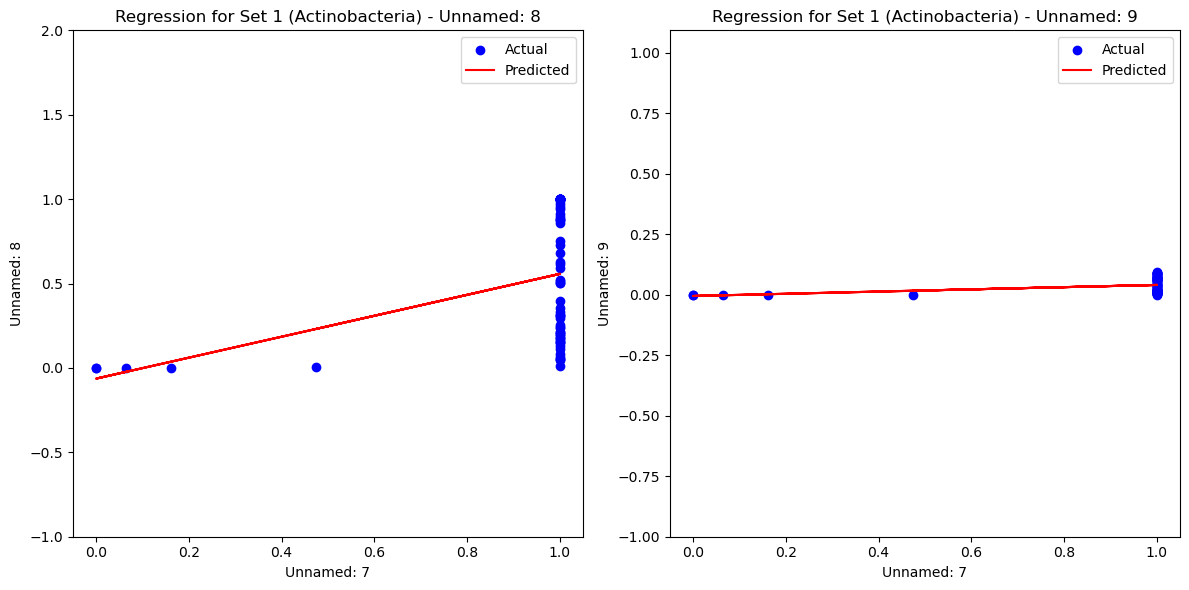

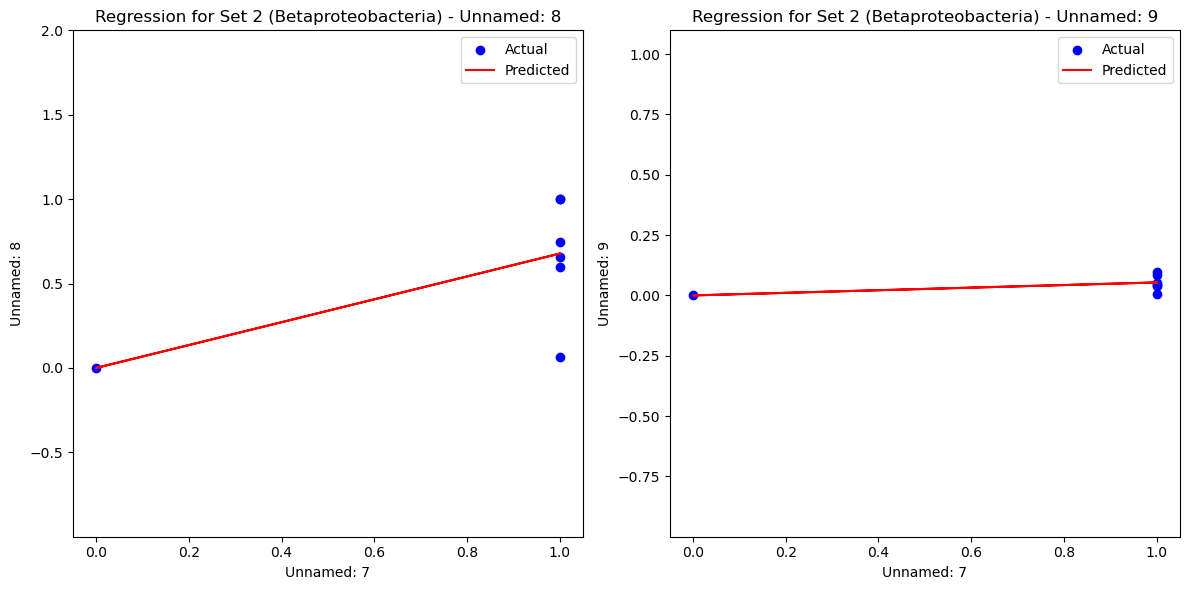

In [38]:
print("Matching values in the second column")
print(matching_values)

# Step 4: Identify and separate different matching sets
set1_indices = matching_values[matching_values.str.contains("Actinobacteria")].index
set2_indices = matching_values[matching_values.str.contains("Betaproteobacteria")].index

# Extract data for Actinobacteria (Set 1)
X_set1 = df.loc[set1_indices, 'Unnamed: 7'].astype(float).values.reshape(-1, 1)
Y1_set1 = df.loc[set1_indices, 'Unnamed: 8'].astype(float).values.reshape(-1, 1)
Y2_set1 = df.loc[set1_indices, 'Unnamed: 9'].astype(float).values.reshape(-1, 1)

# Extract data for Betaproteobacteria (Set 2)
X_set2 = df.loc[set2_indices, 'Unnamed: 7'].astype(float).values.reshape(-1, 1)
Y1_set2 = df.loc[set2_indices, 'Unnamed: 8'].astype(float).values.reshape(-1, 1)
Y2_set2 = df.loc[set2_indices, 'Unnamed: 9'].astype(float).values.reshape(-1, 1)

# Flatten the arrays for plotting
X_set1_flat = X_set1.flatten()
Y1_set1_flat = Y1_set1.flatten()
Y2_set1_flat = Y2_set1.flatten()

X_set2_flat = X_set2.flatten()
Y1_set2_flat = Y1_set2.flatten()
Y2_set2_flat = Y2_set2.flatten()

# Perform linear regression on Set 1 (Actinobacteria)
regressor1_1 = LinearRegression()
regressor1_1.fit(X_set1, Y1_set1)
Y1_set1_pred = regressor1_1.predict(X_set1)

regressor1_2 = LinearRegression()
regressor1_2.fit(X_set1, Y2_set1)
Y2_set1_pred = regressor1_2.predict(X_set1)

# Perform linear regression on Set 2 (Betaproteobacteria)
regressor2_1 = LinearRegression()
regressor2_1.fit(X_set2, Y1_set2)
Y1_set2_pred = regressor2_1.predict(X_set2)

regressor2_2 = LinearRegression()
regressor2_2.fit(X_set2, Y2_set2)
Y2_set2_pred = regressor2_2.predict(X_set2)

# Step 6: Plot the results

# Plot for Set 1 (Actinobacteria)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_set1_flat, Y1_set1_flat, color='blue', label='Actual')
plt.plot(X_set1_flat, Y1_set1_pred, color='red', label='Predicted')
plt.title('Regression for Set 1 (Actinobacteria) - Unnamed: 8')
plt.xlabel('Unnamed: 7')
plt.ylabel('Unnamed: 8')
plt.legend()
plt.ylim(min(Y1_set1_flat) - 1, max(Y1_set1_flat) + 1)  # Spread out the y-axis

plt.subplot(1, 2, 2)
plt.scatter(X_set1_flat, Y2_set1_flat, color='blue', label='Actual')
plt.plot(X_set1_flat, Y2_set1_pred, color='red', label='Predicted')
plt.title('Regression for Set 1 (Actinobacteria) - Unnamed: 9')
plt.xlabel('Unnamed: 7')
plt.ylabel('Unnamed: 9')
plt.legend()
plt.ylim(min(Y2_set1_flat) - 1, max(Y2_set1_flat) + 1)  # Spread out the y-axis

plt.tight_layout()
plt.show()

# Plot for Set 2 (Betaproteobacteria)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_set2_flat, Y1_set2_flat, color='blue', label='Actual')
plt.plot(X_set2_flat, Y1_set2_pred, color='red', label='Predicted')
plt.title('Regression for Set 2 (Betaproteobacteria) - Unnamed: 8')
plt.xlabel('Unnamed: 7')
plt.ylabel('Unnamed: 8')
plt.legend()
plt.ylim(min(Y1_set2_flat) - 1, max(Y1_set2_flat) + 1)  # Spread out the y-axis

plt.subplot(1, 2, 2)
plt.scatter(X_set2_flat, Y2_set2_flat, color='blue', label='Actual')
plt.plot(X_set2_flat, Y2_set2_pred, color='red', label='Predicted')
plt.title('Regression for Set 2 (Betaproteobacteria) - Unnamed: 9')
plt.xlabel('Unnamed: 7')
plt.ylabel('Unnamed: 9')
plt.legend()
plt.ylim(min(Y2_set2_flat) - 1, max(Y2_set2_flat) + 1)  # Spread out the y-axis

plt.tight_layout()
plt.show()


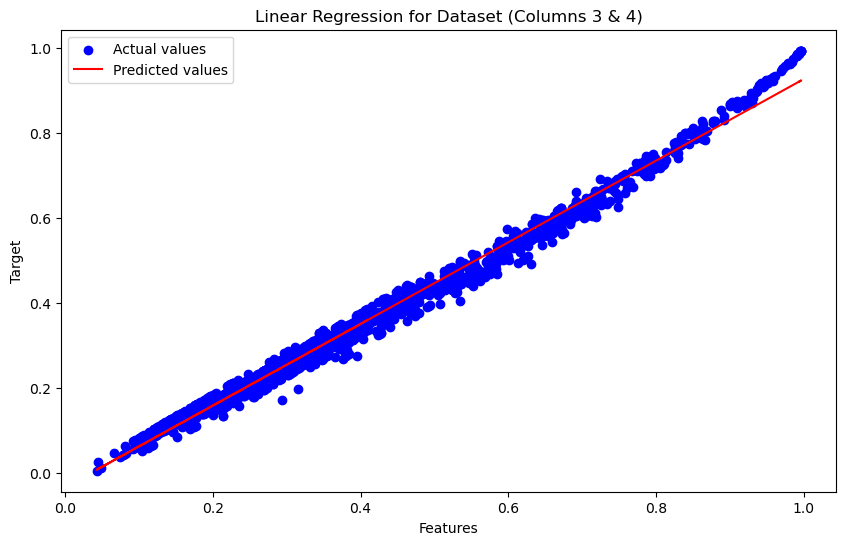

In [39]:
columns_of_interest = [df.columns[2], df.columns[3]]
filtered_df = df[columns_of_interest]

# Convert to numeric and drop NaN values
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce').dropna()

# Define X and Y correctly
X = filtered_df[filtered_df.columns[:-1]].values
Y = filtered_df[filtered_df.columns[-1]].values 

# Regressor model
regressor_model = LinearRegression()
regressor_model.fit(X, Y)
y_preds = regressor_model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, color='blue', label='Actual values')
plt.plot(X[:, 0], y_preds, color='red', label='Predicted values')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Linear Regression for Dataset (Columns 3 & 4)')
plt.legend()
plt.show()




Linear Regression for Columns 2 & 3 - R-squared: 0.99


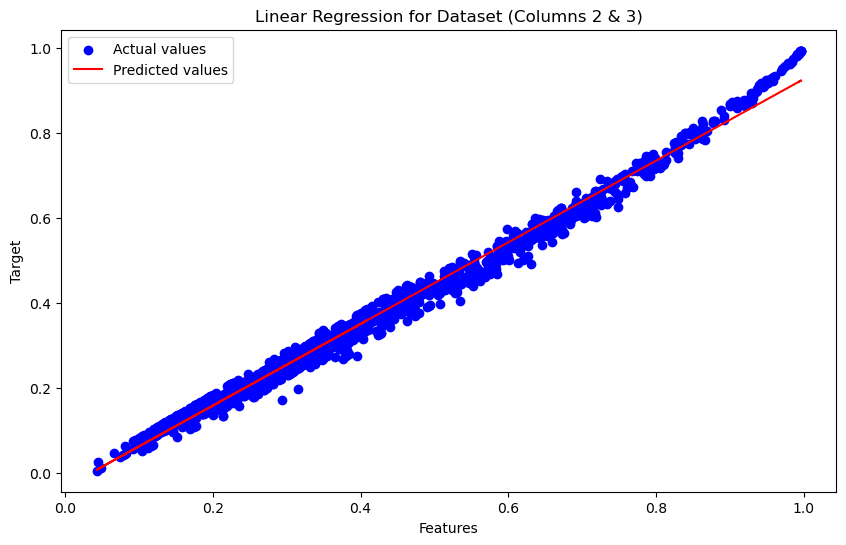

In [42]:
# Define the analysis function
def linear_analysis(X, Y, y_preds, title):
    if X.shape[0] == 0 or Y.shape[0] == 0:
        print(f"No data available for {title}")
        return
    
    r_squared = r2_score(Y, y_preds)    
    print(f"{title} - R-squared: {r_squared:.2f}")
    #print(f"{title} - Mean Squared Error: {mse:.2f}")

# Perform linear regression analysis
linear_analysis(X, Y, y_preds, 'Linear Regression for Columns 2 & 3')

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, color='blue', label='Actual values')
plt.plot(X[:, 0], y_preds, color='red', label='Predicted values')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Linear Regression for Dataset (Columns 2 & 3)')
plt.legend()



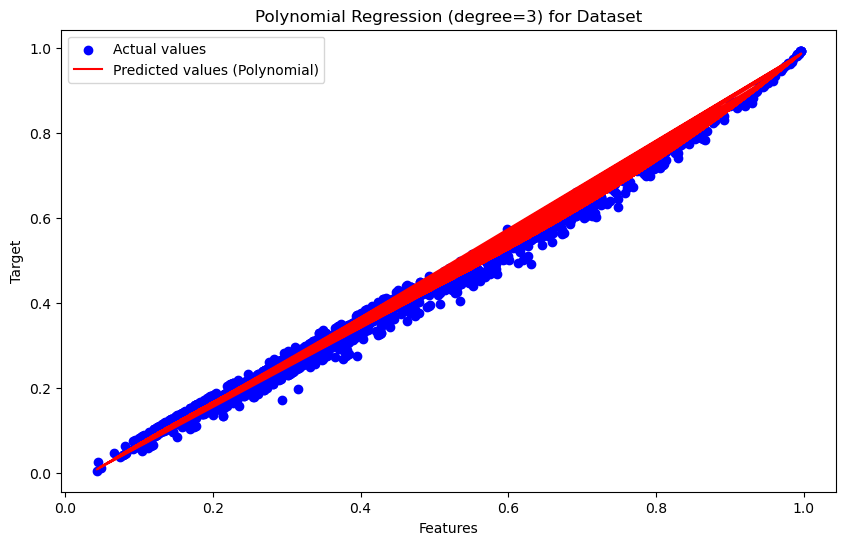

Polynomial Regression (degree=3) - R-squared: 0.99


In [41]:
# Prepare the data for polynomial regression

# Transform the features to polynomial features
degree = 3  # You can change the degree to a higher value if needed
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Create and fit the polynomial regression model
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, Y)
y_poly_pred = poly_regressor.predict(X_poly)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual values')
plt.plot(X, y_poly_pred, color='red', label='Predicted values (Polynomial)')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title(f'Polynomial Regression (degree={degree}) for Dataset')
plt.legend()
plt.show()

# Evaluate the model
r_squared_poly = r2_score(Y, y_poly_pred)
mse_poly = mean_squared_error(Y, y_poly_pred)

print(f"Polynomial Regression (degree={degree}) - R-squared: {r_squared_poly:.2f}")
